In [1]:
from google.colab import drive
import os
import glob
import pandas as pd

drive.mount('/content/drive')
folder_path = '/content/drive/MyDrive/data-science-veiculos-poluicao'
os.chdir(folder_path)

print(os.listdir())

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
['senatran', 'iema', 'senastran_tipo.ipynb', 'MSysObjects.csv', '2025-07-20 18-33-52.mkv', 'iema-agg', 'senatran-agg', 'cidades_lookup.csv', 'cidades.ipynb', 'iema.ipynb', 'analise_1.ipynb', 'TCC ESALQ USP DATA SCIENCE.gdoc', 'analise_2.ipynb', 'iema_outliers.ipynb']


In [2]:
file_path = 'iema-agg/iema-mensal.csv'
df_iema = pd.read_csv(file_path)
display(df_iema.head())

,Month,Estacao,Codigo,Poluente,Unidade,Tipo,Valor
0,2015-01,Americana - Vila Santa Maria,SP01,MP10,ug/m3,automatica,24.389650
1,2015-01,Americana - Vila Santa Maria,SP01,O3,ug/m3,automatica,61.180028
2,2015-01,Anchieta Centro,ES12,MP10,ug/m3,automatica,40.129945
3,2015-01,Anchieta Centro,ES12,MP2.5,ug/m3,automatica,6.615899
4,2015-01,Anchieta Centro,ES12,PTS,ug/m3,automatica,51.927136


In [3]:
df_co = df_iema[df_iema['Poluente'] == 'CO']
display(df_co.head())

,Month,Estacao,Codigo,Poluente,Unidade,Tipo,Valor
15,2015-01,Av. ACM - DETRAN,BA17,CO,ppm,automatico,0.160830
20,2015-01,Av. Barros Reis,BA20,CO,ppm,automatico,0.515109
25,2015-01,Avenida Amazonas,MG01,CO,ppm,Automático,0.187132
42,2015-01,BR - São Bernardo,RJ94,CO,ppm,automatico,0.403143
45,2015-01,Bairro Jardim das Alterosas,MG05,CO,ppm,Automático,0.490738


In [4]:
df_co_agg = df_co.groupby('Month')['Valor'].mean()
df_co_agg.index = pd.to_datetime(df_co_agg.index)
display(df_co_agg.head())

,Valor
Month,
2015-01-01,238.064639
2015-02-01,243.278643
2015-03-01,247.235382
2015-04-01,223.795245
2015-05-01,250.313159


In [5]:
display(df_co_agg[df_co_agg > 1000])

,Valor
Month,
2018-06-01,2683.224474
2018-07-01,23374.709682
2019-01-01,108574.272036
2019-02-01,264537.092273


In [6]:
outlier_months = ['2018-06-01', '2018-07-01', '2019-01-01', '2019-02-01']
df_co = df_co[~df_co['Month'].isin(outlier_months)]
display(df_co.head())

,Month,Estacao,Codigo,Poluente,Unidade,Tipo,Valor
15,2015-01,Av. ACM - DETRAN,BA17,CO,ppm,automatico,0.160830
20,2015-01,Av. Barros Reis,BA20,CO,ppm,automatico,0.515109
25,2015-01,Avenida Amazonas,MG01,CO,ppm,Automático,0.187132
42,2015-01,BR - São Bernardo,RJ94,CO,ppm,automatico,0.403143
45,2015-01,Bairro Jardim das Alterosas,MG05,CO,ppm,Automático,0.490738


In [7]:
df_co = df_co.interpolate(method='linear')
display(df_co.head())

/tmp/ipython-input-3026818642.py:1: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  df_co = df_co.interpolate(method='linear')


,Month,Estacao,Codigo,Poluente,Unidade,Tipo,Valor
15,2015-01,Av. ACM - DETRAN,BA17,CO,ppm,automatico,0.160830
20,2015-01,Av. Barros Reis,BA20,CO,ppm,automatico,0.515109
25,2015-01,Avenida Amazonas,MG01,CO,ppm,Automático,0.187132
42,2015-01,BR - São Bernardo,RJ94,CO,ppm,automatico,0.403143
45,2015-01,Bairro Jardim das Alterosas,MG05,CO,ppm,Automático,0.490738


In [8]:
df_co_agg = df_co.groupby('Month')['Valor'].mean()
df_co_agg.index = pd.to_datetime(df_co_agg.index)
display(df_co_agg.head())

,Valor
Month,
2015-01-01,238.064639
2015-02-01,243.278643
2015-03-01,247.235382
2015-04-01,223.795245
2015-05-01,250.313159


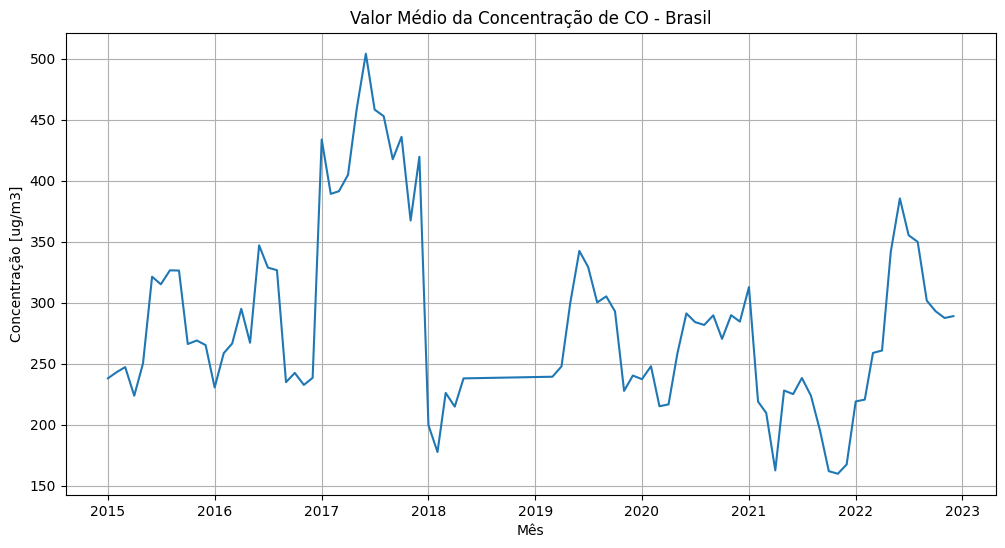

In [9]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(df_co_agg.index[:41].append(df_co_agg.index[50:]), df_co_agg.values[:41].tolist() + df_co_agg.values[50:].tolist())
plt.title('Valor Médio da Concentração de CO - Brasil')
plt.xlabel('Mês')
plt.ylabel('Concentração [ug/m3]')
plt.grid(True)
plt.show()

# Recorte apenas em São Paulo

In [10]:
df_co = df_iema[df_iema['Poluente'] == 'CO']
df_co_sp = df_co[df_iema['Codigo'] == 'SP40']
display(df_co_sp.head())

/tmp/ipython-input-3839671783.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_co_sp = df_co[df_iema['Codigo'] == 'SP40']


,Month,Estacao,Codigo,Poluente,Unidade,Tipo,Valor
408,2015-01,Mooca,SP40,CO,ug/m3,automatica,641.888993
1162,2015-02,Mooca,SP40,CO,ug/m3,automatica,692.452116
1924,2015-03,Mooca,SP40,CO,ug/m3,automatica,719.508145
2696,2015-04,Mooca,SP40,CO,ug/m3,automatica,582.606833
3469,2015-05,Mooca,SP40,CO,ug/m3,automatica,639.579618


In [11]:
df_co_agg = df_co_sp.groupby('Month')['Valor'].mean()
df_co_agg.index = pd.to_datetime(df_co_agg.index)
display(df_co_agg.head())

,Valor
Month,
2015-01-01,641.888993
2015-02-01,692.452116
2015-03-01,719.508145
2015-04-01,582.606833
2015-05-01,639.579618


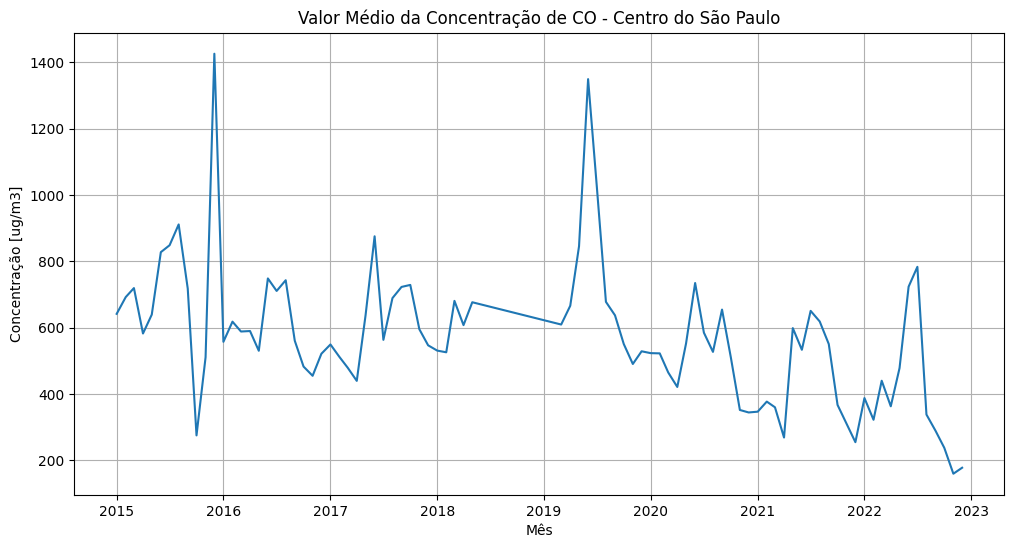

In [12]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(df_co_agg.index[:41].append(df_co_agg.index[50:]), df_co_agg.values[:41].tolist() + df_co_agg.values[50:].tolist())
plt.title('Valor Médio da Concentração de CO - Centro do São Paulo')
plt.xlabel('Mês')
plt.ylabel('Concentração [ug/m3]')
plt.grid(True)
plt.show()